<a href="https://colab.research.google.com/github/somyamangla/CANCER-PREDICTION/blob/main/Lung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

In [ ]:
train = pd.read_excel("lung_train.xlsx")
test = pd.read_excel("lung_test.xlsx")

In [ ]:
train=train.drop(['Patient Id'], axis=1)
test=test.drop(['Patient Id'], axis=1)

In [ ]:
test

,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,Obesity,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level
0,62,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
1,29,2,6,7,7,7,7,6,7,7,...,2,7,6,7,6,7,2,3,1,High
2,26,1,6,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
3,65,1,6,8,7,7,7,6,2,4,...,2,7,6,5,1,9,3,4,2,Medium
4,38,2,2,1,5,3,2,3,2,4,...,6,7,2,5,8,1,3,2,3,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,28,2,1,6,7,5,3,2,6,2,...,3,3,7,7,4,8,7,7,5,Low
231,35,2,2,6,2,3,6,6,6,4,...,5,5,4,6,5,4,6,5,7,High
232,42,1,2,4,5,6,5,5,4,6,...,8,7,7,3,8,9,1,6,2,High
233,32,2,1,6,7,8,7,6,7,7,...,3,2,6,4,2,3,1,2,1,High


In [ ]:
test['Level'] = test['Level'].map({'Low':0,'Medium':1, 'High': 2})

In [ ]:
train['Level'] = train['Level'].map({'Low':0,'Medium':1, 'High': 2})

In [ ]:
X_train = train.iloc[:,:-1]
y_train = train['Level']

In [ ]:
X_test = test.iloc[:,:-1]
y_test = test['Level']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score

In [ ]:
prediction = model.predict(X_test)
prediction

array([2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 0, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0])

In [ ]:
import sklearn.metrics as metrics

In [ ]:
accuracy = metrics.accuracy_score(prediction,y_test)
accuracy

0.9234042553191489

Optimal number of features : 6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


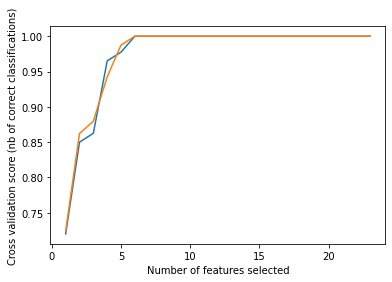

In [21]:
svc = SVC(kernel='linear')
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of Features Vs Cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [24]:
from sklearn.svm import SVC

SV = SVC(probability=True, random_state=0) 
SV.fit(X_train, y_train)
print('SVM Classifier Training Accuracy:', SV.score(X_train, y_train))

SVM Classifier Training Accuracy: 0.9687108886107635


In [25]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

In [26]:
#Import Library
from sklearn.ensemble import GradientBoostingClassifier
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create Gradient Boosting Classifier object
gbclass = GradientBoostingClassifier(
                    random_state = 1000,
                    verbose = 0,
                    n_estimators = 10,
                    learning_rate = 0.9,
                    loss = 'deviance',
                    max_depth = 3
                   )
#gbclass = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
# Train the model using the training sets and check score
gbclass.fit(X_train, y_train)
#Predict Output
predicted= gbclass.predict(X_test)

gbclass_score = round(gbclass.score(X_train, y_train) * 100, 2)
gbclass_score_test = round(gbclass.score(X_test, y_test) * 100, 2)
print('Score: \n', gbclass_score)
print('Test Score: \n', gbclass_score_test)
print('Accuracy: \n', accuracy_score(y_test,predicted))
print(confusion_matrix(predicted,y_test))
print(classification_report(y_test,predicted))

Score: 
 100.0
Test Score: 
 92.34
Accuracy: 
 0.9234042553191489
[[60  2  3]
 [ 3 64  8]
 [ 2  0 93]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        65
           1       0.85      0.97      0.91        66
           2       0.98      0.89      0.93       104

    accuracy                           0.92       235
   macro avg       0.92      0.93      0.92       235
weighted avg       0.93      0.92      0.92       235



In [27]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [28]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc7 = accuracy_score(y_test, y_pred)

[[60  3  2]
 [ 2 64  0]
 [ 3  8 93]]


In [29]:
print(f"By XG Boost classifier Acc: {acc7}")

By XG Boost classifier Acc: 0.9234042553191489


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
LR = LinearRegression()

LR.fit(X_train,y_train)

LinearRegression()

In [32]:
y_prediction =  LR.predict(X_test)
y_prediction

array([ 1.80491645,  1.74565162,  1.97788711,  0.97431553,  0.88745868,
        0.9205056 ,  2.24713662,  1.00081104,  2.05314287,  1.88425921,
        0.97381242,  0.40156934,  0.00883376,  2.3931264 ,  0.12343844,
        0.88555436,  0.21036097,  0.67546309, -0.08264224,  0.25087836,
        0.29381389, -0.22171378, -0.11873215, -0.56773348,  1.93227547,
        0.21050228, -0.38984062,  0.01784246, -0.06662497,  0.25049564,
        0.07321761,  0.13331482,  0.32587001,  0.16258507, -0.02657962,
        1.98085358,  0.06119965,  0.02893467, -0.09719209,  0.1211802 ,
       -0.15298617,  0.88234461,  1.03098794,  0.80155125,  0.95670133,
        0.88094428,  1.89866957,  0.91211933,  0.78669219,  0.9701391 ,
        0.88745868,  0.93999561,  0.91445336,  0.78902196,  0.92607417,
        0.99608672,  1.02586962,  1.86715744,  0.89208962,  0.95621766,
        1.04490938,  0.88467439,  1.0314716 ,  0.87259961,  0.93255123,
        1.95454977,  2.00034358,  2.26384234,  1.94595038,  1.53

In [34]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_prediction)

In [35]:
Accuracy=r2_score(y_test,y_prediction)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 74.04


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [38]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2'],'solver':['liblinear']}
model = GridSearchCV(LogisticRegression(), tuned_params, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='roc_auc')

In [47]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [48]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[54  6  5]
 [ 2 54 10]
 [ 3 11 90]]


In [49]:
acc4 = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc4}")

Accuracy score : 0.8425531914893617
